# Proyecto final

Andrea Monzon 23006810

Juan Pablo Rodas 23007521

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from matplotlib import patches

In [108]:
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

from feature_engine.imputation import MeanMedianImputer
from feature_engine.encoding import OneHotEncoder, OrdinalEncoder
from feature_engine.transformation import LogTransformer

from feature_engine.outliers import OutlierTrimmer

In [2]:
dataTrain = pd.read_csv('train.csv')
dataTest = pd.read_csv('test.csv')
print(dataTrain.shape)
print(dataTest.shape)

(103904, 25)
(25976, 25)


In [3]:
dataTrain.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


separacion entre variables categoricas, discretas y continuas

In [4]:
def getColumnTypes(dataset):
     ''' Descripcion: Esta función extrae el tipo de dominio de las columnas de un dataset.
         Entradas: Pandas Dataframe  
         Salida: Tupla con arreglo que contine nombres de las columnas. '''
     
     continuas = []
     discretas = []
     categoricas = []
     for col in dataset.columns:
          if((dataset[col].dtype == 'int64') or (dataset[col].dtype == 'float64')):
               if(len(dataset[col].unique()) > 30): #criterio para discretas o continuas
                    continuas.append(col)
               else:
                    discretas.append(col)
          else:
               categoricas.append(col)

     return continuas, discretas, categoricas

In [5]:
continuas, discretas, categoricas = getColumnTypes(dataTrain)

## Seleccion de Variables

variable a predecir:

**satisfaction**

In [6]:
y_test = dataTest['satisfaction']
y_train = dataTrain['satisfaction']
y_train.head()

0    neutral or dissatisfied
1    neutral or dissatisfied
2                  satisfied
3    neutral or dissatisfied
4                  satisfied
Name: satisfaction, dtype: object

variables predictoras:

**Todas menos ID y la primera columna de conteo (unamed)**

In [7]:
var_preds = continuas+discretas+categoricas
var_preds.remove('Unnamed: 0')
var_preds.remove('id')
var_preds.remove('satisfaction')
print(var_preds)

['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Gender', 'Customer Type', 'Type of Travel', 'Class']


In [40]:
X_train = dataTrain[var_preds].copy()
X_test = dataTest[var_preds].copy()
X_train.head()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Gender,Customer Type,Type of Travel,Class
0,13,460,25,18.0,3,4,3,1,5,3,...,4,3,4,4,5,5,Male,Loyal Customer,Personal Travel,Eco Plus
1,25,235,1,6.0,3,2,3,3,1,3,...,1,5,3,1,4,1,Male,disloyal Customer,Business travel,Business
2,26,1142,0,0.0,2,2,2,2,5,5,...,4,3,4,4,4,5,Female,Loyal Customer,Business travel,Business
3,25,562,11,9.0,2,5,5,5,2,2,...,2,5,3,1,4,2,Female,Loyal Customer,Business travel,Business
4,61,214,0,0.0,3,3,3,3,4,5,...,3,4,4,3,3,3,Male,Loyal Customer,Business travel,Business


## Ingenieria de Caracteristicas

### Imputacion de variables

In [41]:
dataTrain.isnull().mean()

Unnamed: 0                           0.000000
id                                   0.000000
Gender                               0.000000
Customer Type                        0.000000
Age                                  0.000000
Type of Travel                       0.000000
Class                                0.000000
Flight Distance                      0.000000
Inflight wifi service                0.000000
Departure/Arrival time convenient    0.000000
Ease of Online booking               0.000000
Gate location                        0.000000
Food and drink                       0.000000
Online boarding                      0.000000
Seat comfort                         0.000000
Inflight entertainment               0.000000
On-board service                     0.000000
Leg room service                     0.000000
Baggage handling                     0.000000
Checkin service                      0.000000
Inflight service                     0.000000
Cleanliness                       

la unica variable con datos faltantes es la de 'Arrival Delay in Minutes' que es una variable continua, por lo que no hay imputacion de variables categoricas

In [42]:
media = dataTrain['Arrival Delay in Minutes'].mean()
mediana = dataTrain['Arrival Delay in Minutes'].median()

print(f"Media: {media}")
print(f"Median: {mediana}")

Media: 15.178678301832152
Median: 0.0


In [43]:
dataAnalysis = dataTrain.copy()
dataAnalysis['AD_Mean'] = np.round(dataAnalysis['Arrival Delay in Minutes'].fillna(media))
dataAnalysis['AD_Median'] = np.round(dataAnalysis['Arrival Delay in Minutes'].fillna(mediana))

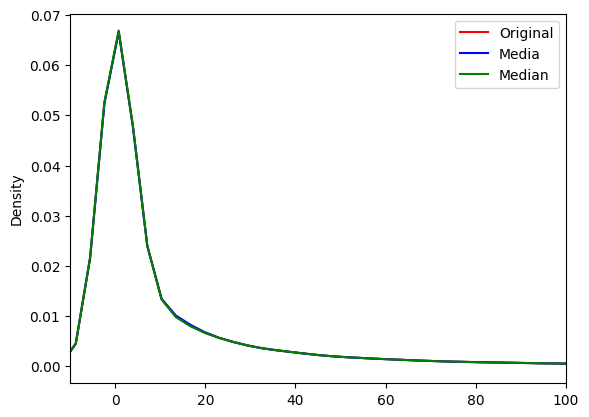

In [44]:
fig = plt.figure()
ax = fig.add_subplot(111)

dataTrain['Arrival Delay in Minutes'].plot.density(color='red', label='Original')
dataAnalysis['AD_Mean'].plot.density(color='blue', label='Media')
dataAnalysis['AD_Median'].plot.density(color='green', label='Median')
plt.xlim(-10, 100)
ax.legend()

no hay mayor diferencia entre imputacion de media o mediana, sin embargo consideramos que lo mas sensato seria hacer imputacion de mediana ya que lo mas probable es que el dato correspondiente es de 0 minutos de atraso.

In [45]:
X_test['Arrival Delay in Minutes'] = X_test['Arrival Delay in Minutes'].fillna(mediana)
X_train['Arrival Delay in Minutes'] = X_train['Arrival Delay in Minutes'].fillna(mediana)

In [46]:
X_train.isnull().mean()

Age                                  0.0
Flight Distance                      0.0
Departure Delay in Minutes           0.0
Arrival Delay in Minutes             0.0
Inflight wifi service                0.0
Departure/Arrival time convenient    0.0
Ease of Online booking               0.0
Gate location                        0.0
Food and drink                       0.0
Online boarding                      0.0
Seat comfort                         0.0
Inflight entertainment               0.0
On-board service                     0.0
Leg room service                     0.0
Baggage handling                     0.0
Checkin service                      0.0
Inflight service                     0.0
Cleanliness                          0.0
Gender                               0.0
Customer Type                        0.0
Type of Travel                       0.0
Class                                0.0
dtype: float64

### Codificacion de Variables Categoricas

In [47]:
categoricas

['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']

#### Gender

In [48]:
X_train['Gender'].value_counts()

Female    52727
Male      51177
Name: Gender, dtype: int64

la mejor codificacion para esta variable seria de tipo OHE de k-1

0 -> Female

1 -> Male

In [49]:
X_train['Gender'] = pd.get_dummies(X_train['Gender'],drop_first=True)
X_test['Gender'] = pd.get_dummies(X_test['Gender'],drop_first=True)

In [50]:
X_train['Gender'].value_counts()

0    52727
1    51177
Name: Gender, dtype: int64

#### Customer Type

In [51]:
X_train['Customer Type'].value_counts()

Loyal Customer       84923
disloyal Customer    18981
Name: Customer Type, dtype: int64

la mejor codificacion para esta variable seria de tipo OHE de k-1

0 -> Loyal Customer

1 -> disloyal Customer

In [52]:
X_train['Customer Type'] = pd.get_dummies(X_train['Customer Type'],drop_first=True)
X_test['Customer Type'] = pd.get_dummies(X_test['Customer Type'],drop_first=True)

In [53]:
X_train['Customer Type'].value_counts()

0    84923
1    18981
Name: Customer Type, dtype: int64

#### Type of Travel

In [54]:
X_train['Type of Travel'].value_counts()

Business travel    71655
Personal Travel    32249
Name: Type of Travel, dtype: int64

la mejor codificacion para esta variable seria de tipo OHE de k-1

0 -> Business travel

1 -> Personal Travel

In [55]:
X_train['Type of Travel'] = pd.get_dummies(X_train['Type of Travel'],drop_first=True)
X_test['Type of Travel'] = pd.get_dummies(X_test['Type of Travel'],drop_first=True)

In [56]:
X_train['Type of Travel'].value_counts()

0    71655
1    32249
Name: Type of Travel, dtype: int64

#### Class

In [57]:
X_train['Class'].value_counts()

Business    49665
Eco         46745
Eco Plus     7494
Name: Class, dtype: int64

la mejor codificacion para esta variable seria de tipo label encoding

0 -> Business

1 -> Eco

2 -> Eco Plus

In [58]:
class_mapper = {'Business': 0, 'Eco':1, 'Eco Plus':2}
class_mapper

{'Business': 0, 'Eco': 1, 'Eco Plus': 2}

In [59]:
X_train['Class'] = X_train['Class'].map(class_mapper)
X_test['Class'] = X_test['Class'].map(class_mapper)

In [60]:
X_train['Class'].value_counts()

0    49665
1    46745
2     7494
Name: Class, dtype: int64

#### satisfaction

In [61]:
y_train.value_counts()

satisfied
0            58879
1            45025
dtype: int64

la mejor codificacion para esta variable seria de tipo OHE de k-1

0 -> neutral or dissatisfied

1 -> satisfied

In [62]:
y_train = pd.get_dummies(y_train,drop_first=True)
y_test = pd.get_dummies(y_test,drop_first=True)

In [63]:
y_train.value_counts()

satisfied
0            58879
1            45025
dtype: int64

### Transformacion de Variables Numericas

In [64]:
def plot_density_qq(dataset, col):
     ''' Esta función muestra la gráfica de densisidad y el plot QQ para verificar normalidad. '''

     plt.figure(figsize=(15, 6))
     plt.subplot(1, 2, 1)
     dataset[col].hist(bins=30)
     plt.subplot(1, 2 ,2)
     stats.probplot(dataset[col], dist='norm', plot=plt)
     plt.title(col)
     plt.show()

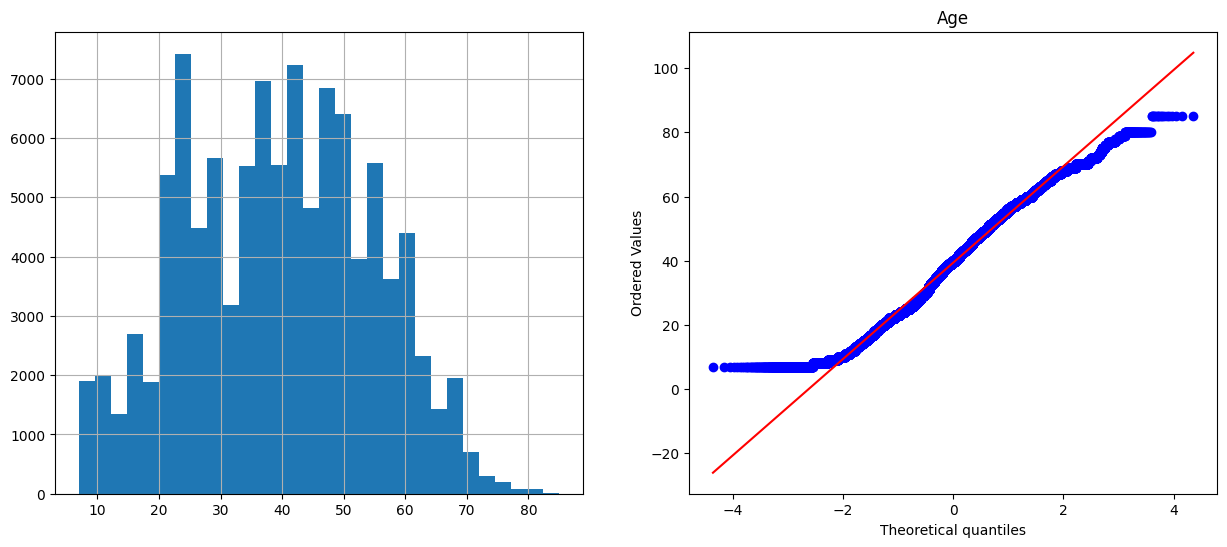

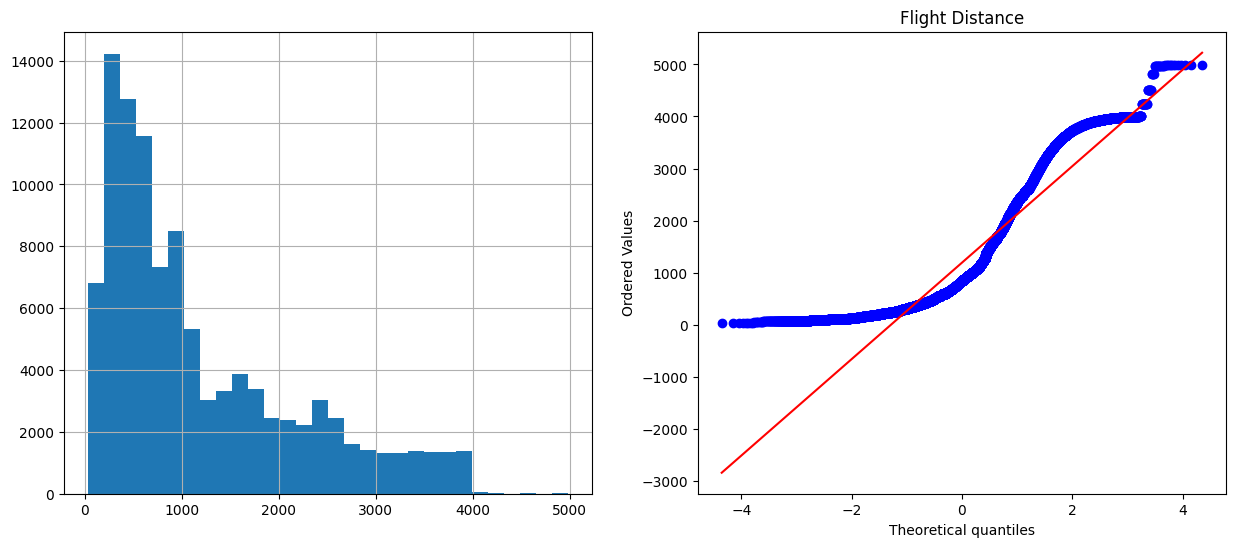

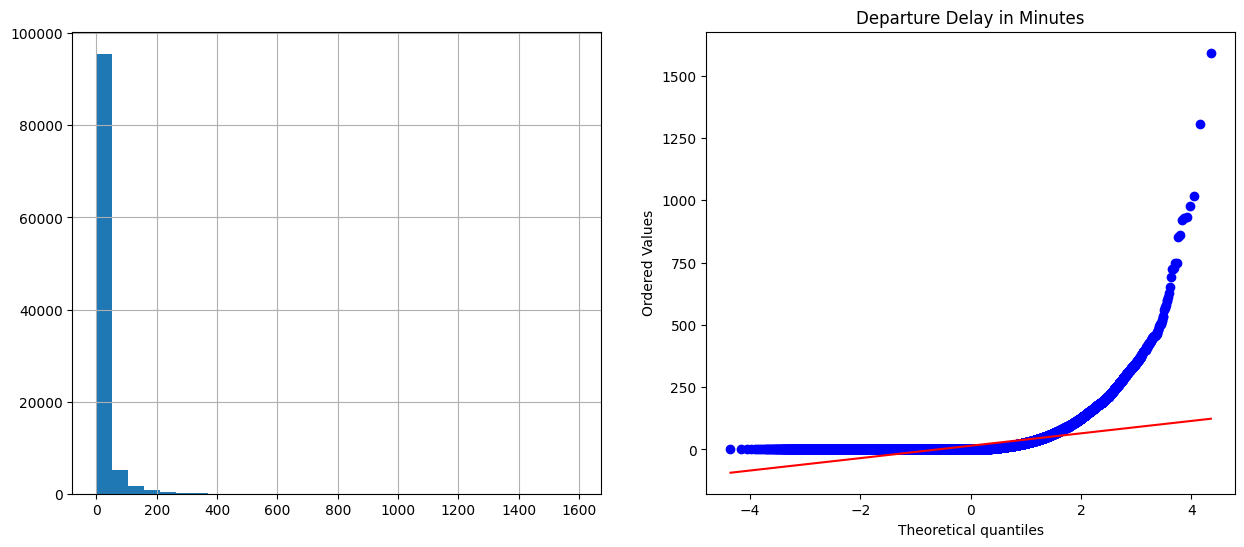

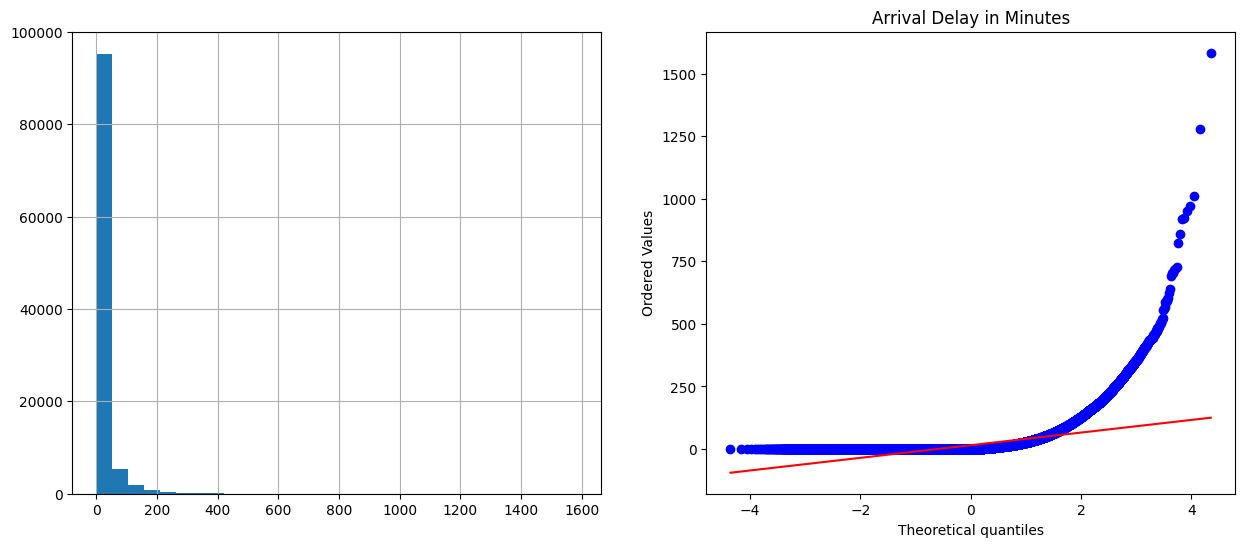

In [65]:
cont_wo_id = continuas.copy()
cont_wo_id.remove('id')
cont_wo_id.remove('Unnamed: 0')

for col in cont_wo_id:
    plot_density_qq(X_train,col)

no seria necesario una transformacion de variables ya que las a las variables de Delay no se les puede aplicar ni transformacion logaritmica ni inversa ni de box cox por tener valores en 0, y tampoco se ve una necesidad de hacerlo

### Tratamiento de Outliers

el tratamiento de outliers se hara unicamente para las variables Departure Delay in minutes y Arrival delay in minutes y se usara el metodo de Capping

In [66]:
def detectOutliersLimits(dataset, col):
     '''
     Descripción: Calcula los limites superiores e inferiores para detección de outliers.
     Input: dataset-> pandas dataframe, col -> string nombre de columna
     Output: tupla de floats con los limites superior e inferior
     '''
     IQR = dataset[col].quantile(0.75) - dataset[col].quantile(0.25)
     LI =  dataset[col].quantile(0.25) - (IQR*1.75)
     LS = dataset[col].quantile(0.75) + (IQR*1.75)

     return LI, LS

#### Departure Delay in Minutes

In [67]:
LI, LS = detectOutliersLimits(X_train, 'Departure Delay in Minutes')

X_train['Departure Delay in Minutes'] = np.where(X_train['Departure Delay in Minutes']  > LS, LS, 
                                        np.where(X_train['Departure Delay in Minutes']  < LI, LI, 
                                        X_train['Departure Delay in Minutes'] ))

X_test['Departure Delay in Minutes'] =  np.where(X_test['Departure Delay in Minutes']  > LS, LS, 
                                        np.where(X_test['Departure Delay in Minutes']  < LI, LI, 
                                        X_test['Departure Delay in Minutes'] ))

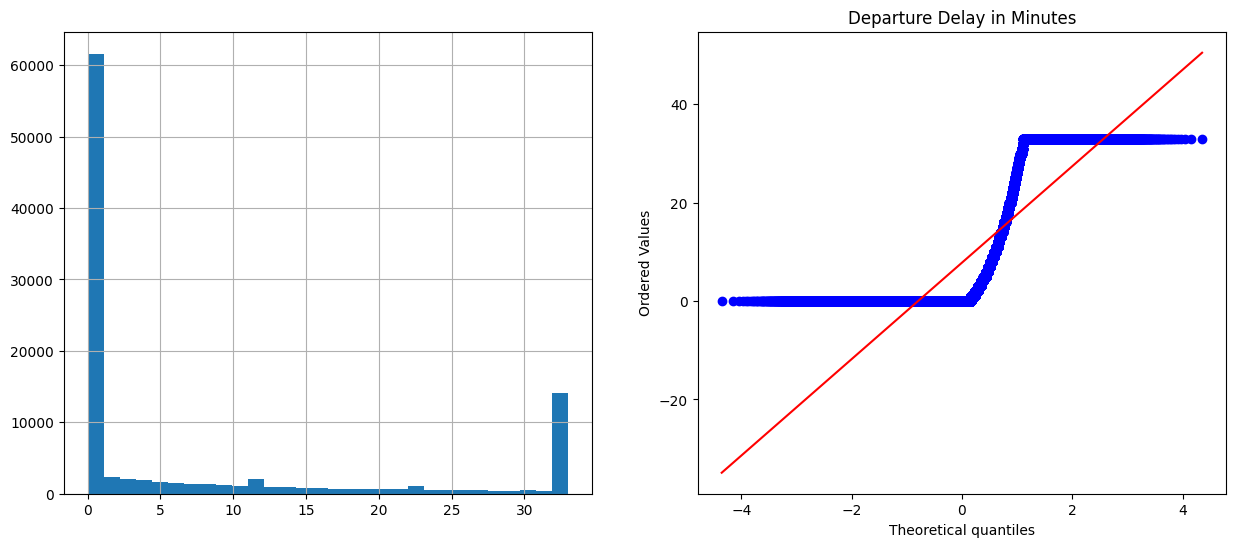

In [68]:
plot_density_qq(X_train,'Departure Delay in Minutes')

#### Arrival Delay in Minutes

In [69]:
LI, LS = detectOutliersLimits(X_train, 'Arrival Delay in Minutes')

X_train['Arrival Delay in Minutes'] = np.where(X_train['Arrival Delay in Minutes']  > LS, LS, 
                                        np.where(X_train['Arrival Delay in Minutes']  < LI, LI, 
                                        X_train['Arrival Delay in Minutes'] ))

X_test['Arrival Delay in Minutes'] =  np.where(X_test['Arrival Delay in Minutes']  > LS, LS, 
                                        np.where(X_test['Arrival Delay in Minutes']  < LI, LI, 
                                        X_test['Arrival Delay in Minutes'] ))

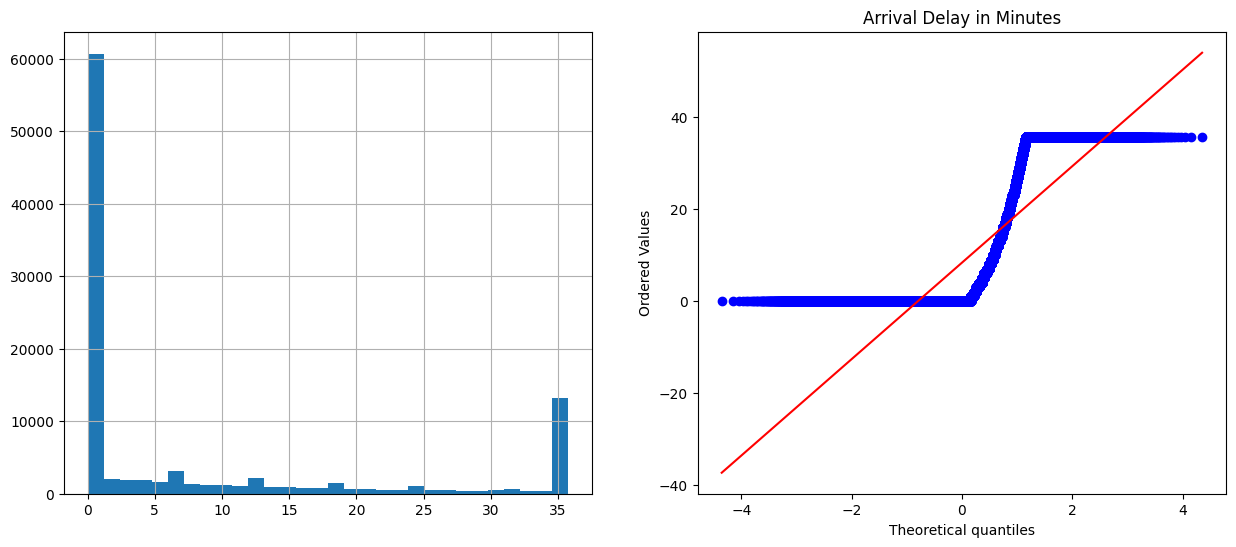

In [70]:
plot_density_qq(X_train,'Arrival Delay in Minutes')

### Estandarizacion de Variables

In [71]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [72]:
scaler = MinMaxScaler()
scaler.fit(X_train) #calculamos información interna (parámetros) para transformaciones posteriores.

X_train_std = scaler.transform(X_train)
X_train_std = pd.DataFrame(X_train_std, columns=X_train.columns)
X_test_std = scaler.transform(X_test)
X_test_std = pd.DataFrame(X_test_std, columns=X_train.columns)


In [73]:
X_train_std

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Gender,Customer Type,Type of Travel,Class
0,0.076923,0.086632,0.757576,0.503497,0.6,0.8,0.6,0.2,1.0,0.6,...,0.8,0.6,0.75,0.8,1.0,1.0,1.0,0.0,1.0,1.0
1,0.230769,0.041195,0.030303,0.167832,0.6,0.4,0.6,0.6,0.2,0.6,...,0.2,1.0,0.50,0.2,0.8,0.2,1.0,1.0,0.0,0.0
2,0.243590,0.224354,0.000000,0.000000,0.4,0.4,0.4,0.4,1.0,1.0,...,0.8,0.6,0.75,0.8,0.8,1.0,0.0,0.0,0.0,0.0
3,0.230769,0.107229,0.333333,0.251748,0.4,1.0,1.0,1.0,0.4,0.4,...,0.4,1.0,0.50,0.2,0.8,0.4,0.0,0.0,0.0,0.0
4,0.692308,0.036955,0.000000,0.000000,0.6,0.6,0.6,0.6,0.8,1.0,...,0.6,0.8,0.75,0.6,0.6,0.6,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,0.205128,0.032512,0.090909,0.000000,0.4,0.2,0.4,0.6,0.4,0.4,...,0.6,0.2,0.75,0.4,0.6,0.4,0.0,1.0,0.0,0.5
103900,0.538462,0.467690,0.000000,0.000000,0.8,0.8,0.8,0.8,0.4,0.8,...,1.0,1.0,1.00,1.0,1.0,0.8,1.0,0.0,0.0,0.0
103901,0.294872,0.396607,0.212121,0.391608,0.2,0.2,0.2,0.6,0.8,0.2,...,0.6,0.4,0.75,1.0,1.0,0.8,1.0,1.0,0.0,0.0
103902,0.192308,0.195679,0.000000,0.000000,0.2,0.2,0.2,1.0,0.2,0.2,...,0.8,1.0,0.00,1.0,0.8,0.2,0.0,1.0,0.0,0.5


## Pipeline

In [118]:
NUMERICAL_VARS_WITH_NA = ['Arrival Delay in Minutes']
CATEGORICAL_VARIABLES = ['Gender', 'Customer Type', 'Type of Travel']
CATEGORICAL_VARS_MAP = ['Class']
OUTLIER = ['Arrival Delay in Minutes']

In [167]:
pipeline_fe = Pipeline([
    #======== IMPUTACIONES =============
    
    # 1. Imputacion para variables numericas
    ('median_imputation', 
        MeanMedianImputer(imputation_method='median', variables=NUMERICAL_VARS_WITH_NA)),
    
    # 2. Codificacion de variables categoricas
    ('one_hot_encoding', 
       OneHotEncoder(variables=CATEGORICAL_VARIABLES)),
    
    # 3. Mapper
    ('categorical_encoder',
        OrdinalEncoder(encoding_method='ordered', variables=CATEGORICAL_VARS_MAP)
    ),
    
    # 3. Feature Scaling
    ('scaler',
        MinMaxScaler())
])

In [168]:
dataTrain_pipeline = dataTrain.copy()
dataTrain_pipeline.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [169]:
pipeline_fe.fit(dataTrain_pipeline[var_preds], y_train)

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('median_imputation',
                 MeanMedianImputer(variables=['Arrival Delay in Minutes'])),
                ('one_hot_encoding',
                 OneHotEncoder(variables=['Gender', 'Customer Type',
                                          'Type of Travel'])),
                ('categorical_encoder', OrdinalEncoder(variables=['Class'])),
                ('scaler', MinMaxScaler())])

In [170]:
df_transformed = pd.DataFrame(pipeline_fe.transform(dataTrain_pipeline[var_preds]))

In [171]:
df_transformed.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.076923,0.086632,0.015704,0.011364,0.6,0.8,0.6,0.2,1.0,0.6,...,0.8,1.0,1.0,0.5,1.0,0.0,1.0,0.0,1.0,0.0
1,0.230769,0.041195,0.000628,0.003788,0.6,0.4,0.6,0.6,0.2,0.6,...,0.2,0.8,0.2,1.0,1.0,0.0,0.0,1.0,0.0,1.0
2,0.243590,0.224354,0.000000,0.000000,0.4,0.4,0.4,0.4,1.0,1.0,...,0.8,0.8,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
3,0.230769,0.107229,0.006910,0.005682,0.4,1.0,1.0,1.0,0.4,0.4,...,0.2,0.8,0.4,1.0,0.0,1.0,1.0,0.0,0.0,1.0
4,0.692308,0.036955,0.000000,0.000000,0.6,0.6,0.6,0.6,0.8,1.0,...,0.6,0.6,0.6,1.0,1.0,0.0,1.0,0.0,0.0,1.0


In [172]:
df_transformed

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.076923,0.086632,0.015704,0.011364,0.6,0.8,0.6,0.2,1.0,0.6,...,0.8,1.0,1.0,0.5,1.0,0.0,1.0,0.0,1.0,0.0
1,0.230769,0.041195,0.000628,0.003788,0.6,0.4,0.6,0.6,0.2,0.6,...,0.2,0.8,0.2,1.0,1.0,0.0,0.0,1.0,0.0,1.0
2,0.243590,0.224354,0.000000,0.000000,0.4,0.4,0.4,0.4,1.0,1.0,...,0.8,0.8,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
3,0.230769,0.107229,0.006910,0.005682,0.4,1.0,1.0,1.0,0.4,0.4,...,0.2,0.8,0.4,1.0,0.0,1.0,1.0,0.0,0.0,1.0
4,0.692308,0.036955,0.000000,0.000000,0.6,0.6,0.6,0.6,0.8,1.0,...,0.6,0.6,0.6,1.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,0.205128,0.032512,0.001884,0.000000,0.4,0.2,0.4,0.6,0.4,0.4,...,0.4,0.6,0.4,0.0,0.0,1.0,0.0,1.0,0.0,1.0
103900,0.538462,0.467690,0.000000,0.000000,0.8,0.8,0.8,0.8,0.4,0.8,...,1.0,1.0,0.8,1.0,1.0,0.0,1.0,0.0,0.0,1.0
103901,0.294872,0.396607,0.004397,0.008838,0.2,0.2,0.2,0.6,0.8,0.2,...,1.0,1.0,0.8,1.0,1.0,0.0,0.0,1.0,0.0,1.0
103902,0.192308,0.195679,0.000000,0.000000,0.2,0.2,0.2,1.0,0.2,0.2,...,1.0,0.8,0.2,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [173]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [174]:
pipeline_fe = Pipeline([
    #======== IMPUTACIONES =============
    
    # 1. Imputacion para variables numericas
    ('median_imputation', 
        MeanMedianImputer(imputation_method='median', variables=NUMERICAL_VARS_WITH_NA)),
    
    # 2. Codificacion de variables categoricas
    ('one_hot_encoding', 
       OneHotEncoder(variables=CATEGORICAL_VARIABLES)),
    
    # 3. Mapper
    ('categorical_encoder',
        OrdinalEncoder(encoding_method='ordered', variables=CATEGORICAL_VARS_MAP)
    ),
    
    # 3. Feature Scaling
    ('scaler',
        MinMaxScaler()),

    ('modelo', 
         RandomForestClassifier(criterion = 'entropy', max_depth=None, n_estimators= 150)
    )
])

In [163]:
pipeline_fe.fit(dataTrain_pipeline[var_preds], y_train['satisfied'])

Pipeline(steps=[('median_imputation',
                 MeanMedianImputer(variables=['Arrival Delay in Minutes'])),
                ('one_hot_encoding',
                 OneHotEncoder(variables=['Gender', 'Customer Type',
                                          'Type of Travel'])),
                ('categorical_encoder', OrdinalEncoder(variables=['Class'])),
                ('scaler', MinMaxScaler()),
                ('modelo',
                 RandomForestClassifier(criterion='entropy',
                                        n_estimators=150))])

In [164]:
predictions = pipeline_fe.predict(dataTest[var_preds])

In [165]:
data_results = pd.DataFrame()
data_results['predictions'] = predictions.tolist()
data_results['real_values'] = y_test['satisfied']

In [166]:
data_results

,predictions,real_values
0,1,1
1,1,1
2,0,0
3,1,1
4,0,1
...,...,...
25971,0,0
25972,1,1
25973,0,0
25974,1,1
